In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def generate_random_city_graph(connection_prob=0.1, min_weight=1, max_weight=100):
    """
    Generate a random graph representing cities connected with weighted edges.

    Parameters:
    - num_cities (int): Number of cities (nodes) in the graph.
    - connection_prob (float): Probability of a connection (edge) between any two cities.
    - min_weight (int): Minimum weight (distance) for the edges.
    - max_weight (int): Maximum weight (distance) for the edges.

    Returns:
    - G (networkx.Graph): A NetworkX graph with cities as nodes and weighted edges.
    """
    num_cities = random.randint(20,40)
    # Generate random city names (A, B, C, ...)
    city_names = [chr(65 + i) for i in range(num_cities)]

    # Create a graph
    G = nx.Graph()

    # Add cities as nodes
    G.add_nodes_from(city_names)

    # Randomly connect cities with random weights (distances)
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            weight = random.randint(min_weight, max_weight)  # Random distance
            G.add_edge(city_names[i], city_names[j], weight=weight)

    return G

In [7]:
# Example usage
random_graph = generate_random_city_graph()

In [8]:
def draw_graph(G):
    """
    Draw the generated graph with cities and weighted connections.

    Parameters:
    - G (networkx.Graph): The graph to be drawn.
    """
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)

    # Clear any previous plot
    plt.clf()
    
    # Draw the graph
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})
    #nx.draw_networkx_edge(G, pos, with_labels=False)

    plt.title("Randomly Connected City Graph")
    plt.show()

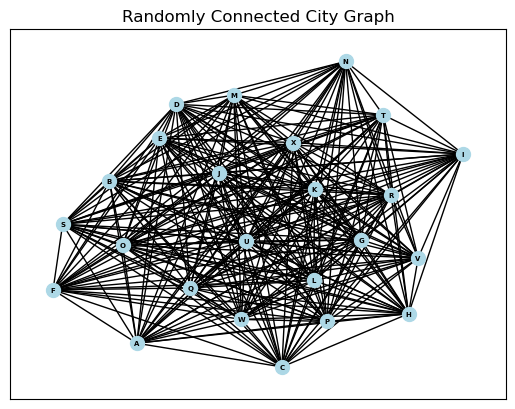

In [9]:
draw_graph(random_graph)

In [ ]:
def generatePopulation(G, NP):
    pass
def evaluateAll(G, NP):
    pass
def evaluate(x):
    pass
def crossover(x, y):
    pass
def mutate(x):
    pass
def GeneticAlgorithm(G):
    NP = 20
    gen = 200
    D = len(G.nodes)
    population = generatePopulation(G, NP)
    evaluationsNP = evaluateAll(G, NP)
    for i in range(0,gen):
        new_population = np.copy(population)
        for j in range(0,NP):
            parent_A = population[j]
            listOfIndices = list(range(0,NP))
            listOfIndices.remove(j) # Possible indices withou j index to ensure we dont pick same index
            randomIndex = random.randint(0,NP - 2) # Go from 0 to NP - 2, because of bounds and one element is removed
            parent_B = population[randomIndex] # Random population
            offspring_AB = crossover(parent_A, parent_B)
            if np.random.uniform() < 0.5:
                offspring_AB = mutate(offspring_AB)
            offspringVal = evaluate(offspring_AB) #Evaluate offspring_AB
            if offspringVal < evaluationsNP[j]:
                new_population[j] = offspring_AB
        population = new_population
    return population
        